## Problem Statement 

#### About the Dataset
- **Age:** Describes the age of individuals. Continuous.
- **Workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- **fnlwgt:** Continuous.
- **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- **education-num:** Number of years spent in education. Continuous.
- **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- **sex:** Female, Male.
- **capital-gain:** Continuous.
- **capital-loss:** Continuous.
- **hours-per-week:** Continuous.
- **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- **salary:** >50K,<=50K

In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("adult.csv")

In [3]:
data.head() 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Renaming columns from -->capital.loss to --> capital_loss format

data.rename(
    columns={"education.num": "education_num", "capital.loss": "capital_loss", "hours.per.week": "hours_per_week", "native.country": "native_country"},
    inplace=True,
)

data

,age,workclass,fnlwgt,education,education_num,marital.status,occupation,relationship,race,sex,capital.gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
data.shape

(32561, 15)

In [6]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Check null values in our complete dataset
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
# check duplicet value in data set
data.duplicated().sum()

24

In [11]:
# drop duplicate value from data
data.drop_duplicates(inplace=True)

In [12]:
data.describe()

,age,fnlwgt,education_num,capital.gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# saprate catigorical and numerical features
catigorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [14]:
catigorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [15]:
numerical_features

Index(['age', 'fnlwgt', 'education_num', 'capital.gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [16]:
data['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [17]:
# fetch the unique value from catigorical data
for i in catigorical_features:
    print(i,data[i].unique())
    
    print()
    print("*****************************Seperated_Columns********************************")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

*****************************Seperated_Columns********************************

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

*****************************Seperated_Columns********************************

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

*****************************Seperated_Columns********************************

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

*****************************Seperated_Columns*****************

In [18]:
# remove ? and replace with mode value # .mode()
data["workclass"] = data["workclass"].replace(" ?"," Private")
data["occupation"] = data["occupation"].replace(" ?"," Prof-specialty")
data["native_country"] = data["native_country"].replace(" ?"," United-States")

# Data Visualization

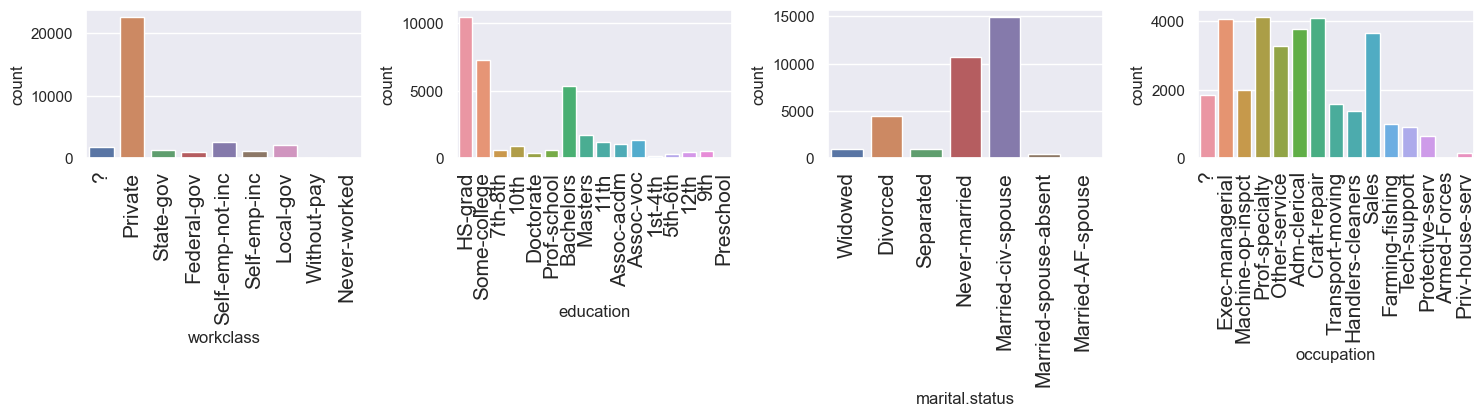

In [19]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

colmns1 = ['workclass', 'education', 'marital.status', 'occupation']

for i in range(0,len(colmns1)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns1[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

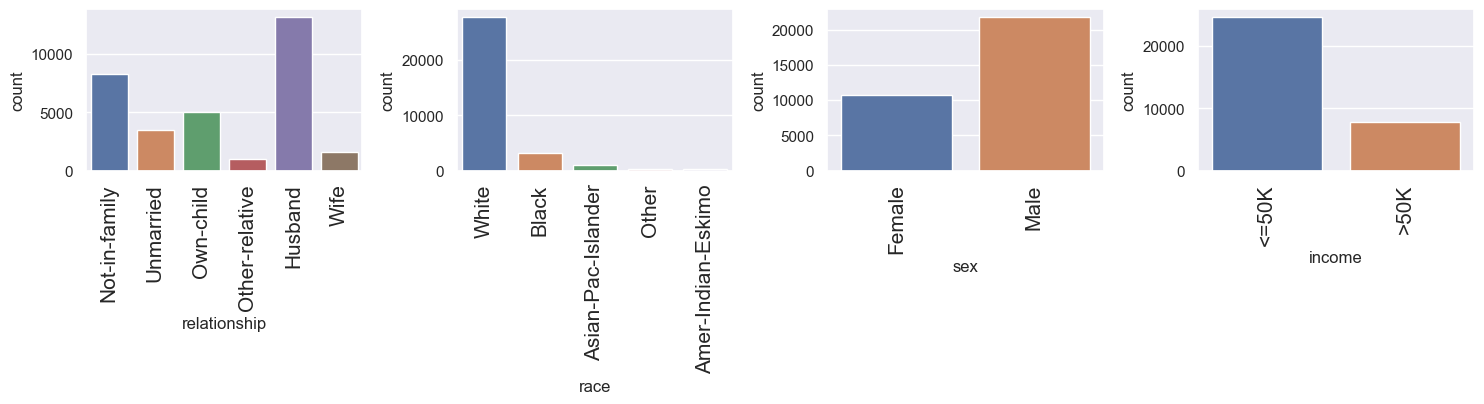

In [20]:
colmns2 = ['relationship', 'race', 'sex', 'income']

for i in range(0,len(colmns2)):
    plt.subplot(2,4,i+1)
    sns.countplot(x=data[colmns2[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

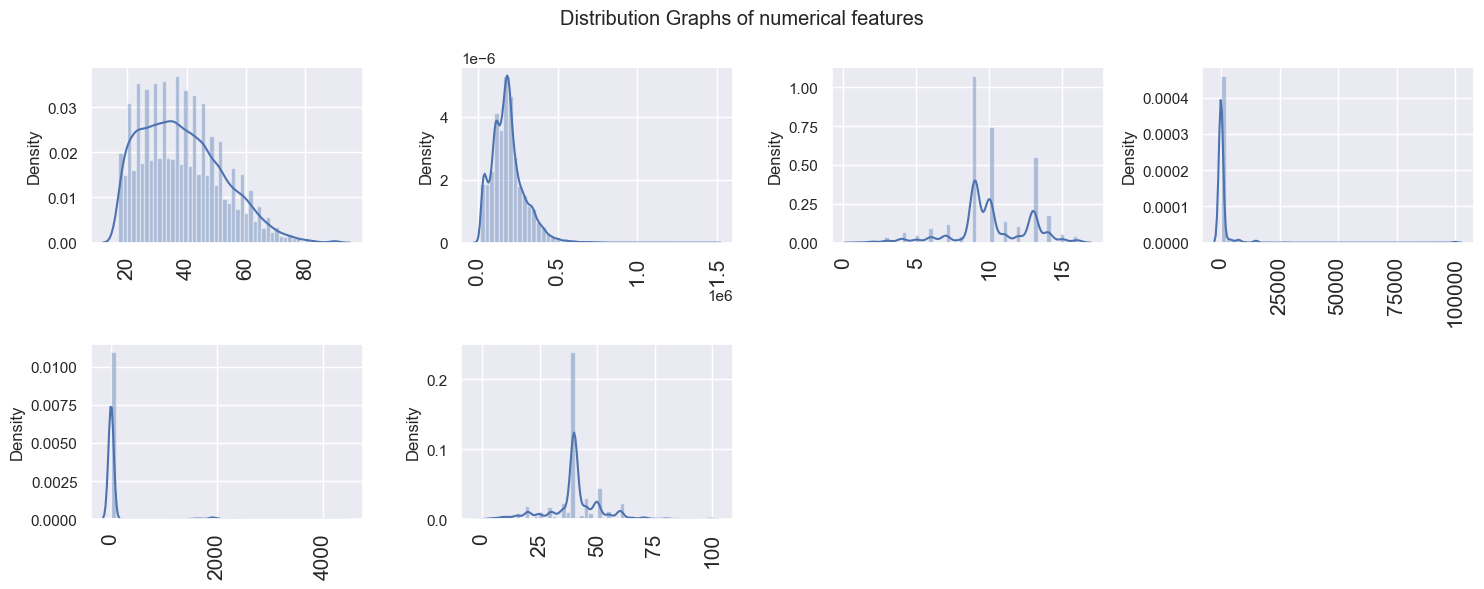

In [21]:
plt.suptitle("Distribution Graphs of numerical features")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.distplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

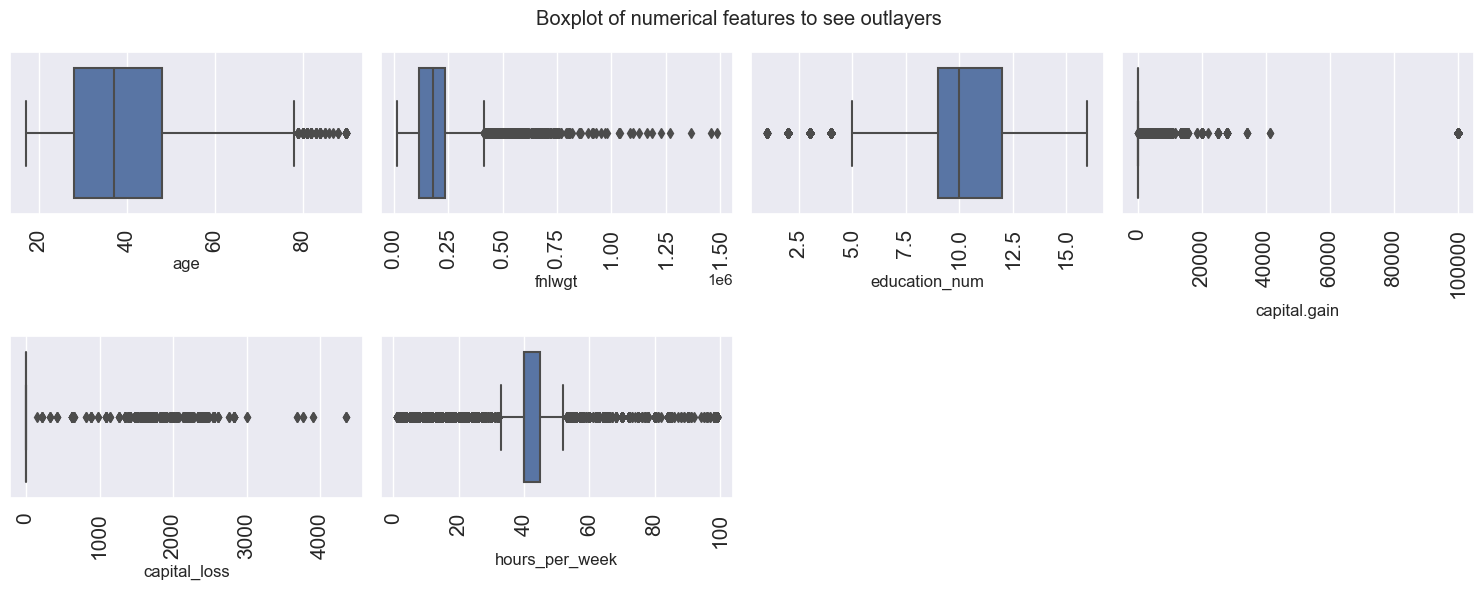

In [22]:
plt.suptitle("Boxplot of numerical features to see outlayers ")
for i in range(0,len(numerical_features)):
    plt.subplot(2,4,i+1)
    sns.boxplot(x=data[numerical_features[i]])
    plt.xticks(size=15,rotation=90)
    plt.tight_layout()

In [23]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital.status,occupation,relationship,race,sex,capital.gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<Axes: xlabel='income'>

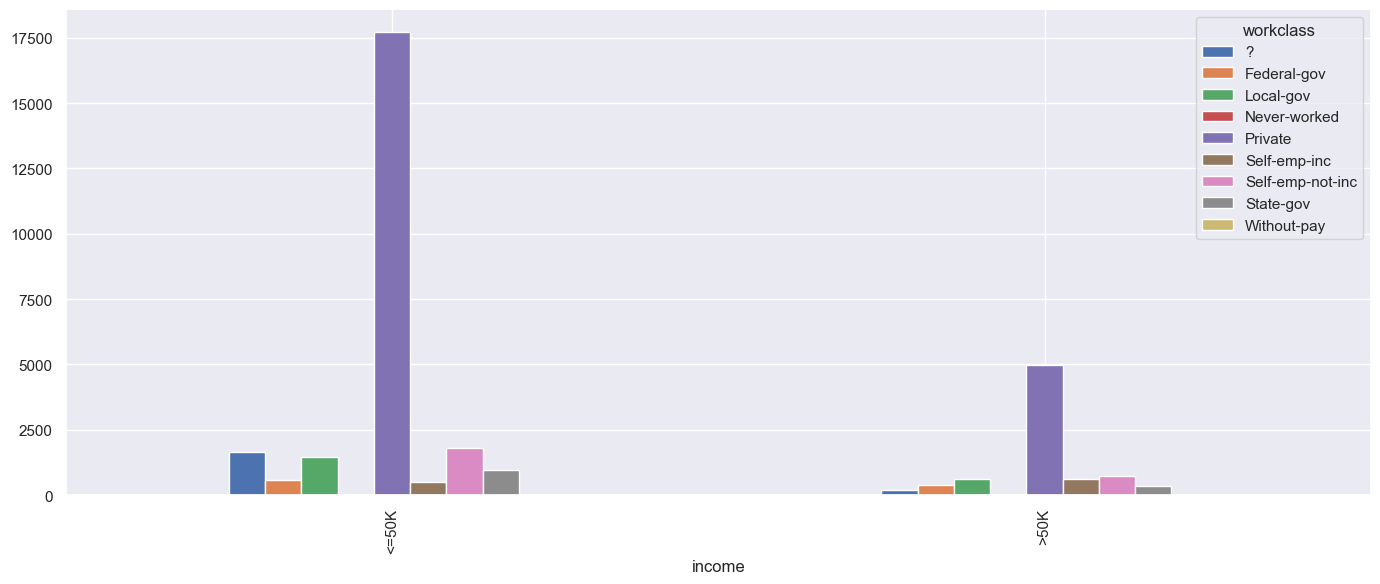

In [24]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

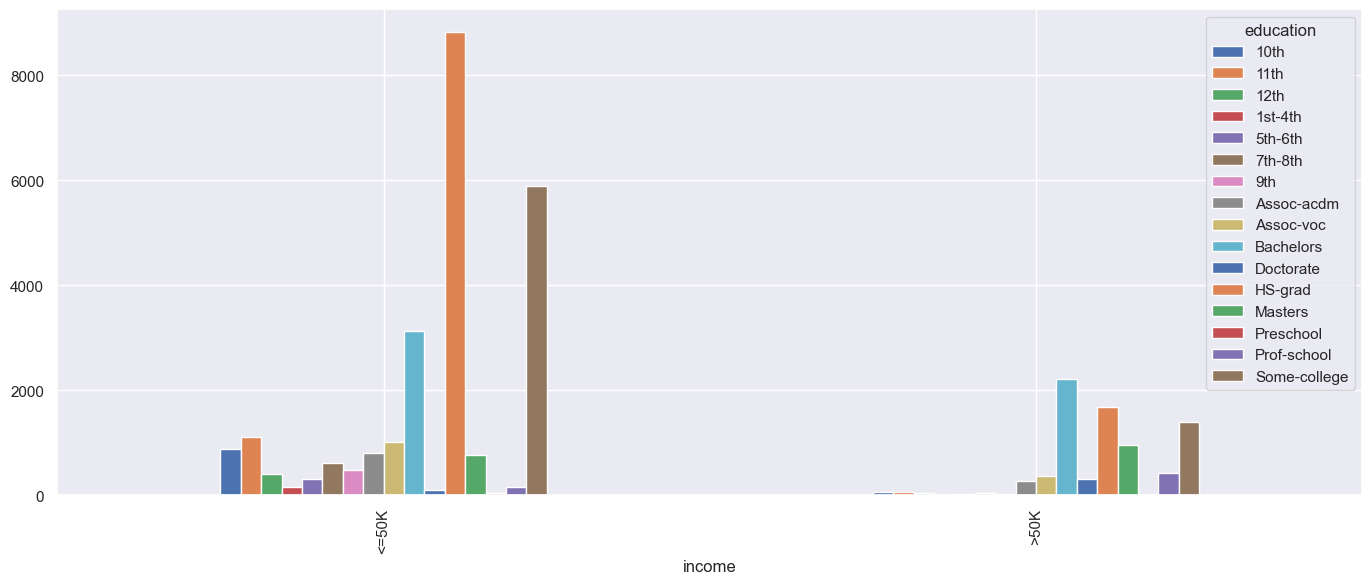

In [25]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind="bar")

<Axes: xlabel='income'>

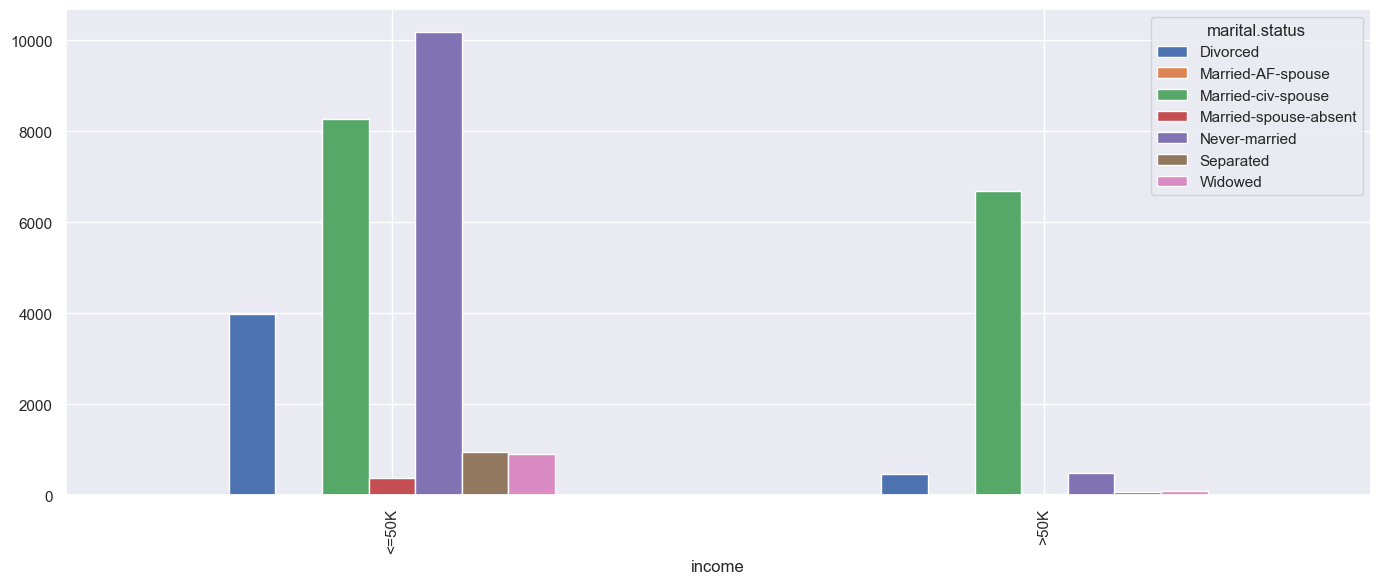

In [26]:
marital_status = pd.crosstab(data['income'],data['marital.status'])
marital_status.plot(kind="bar")

<Axes: xlabel='income'>

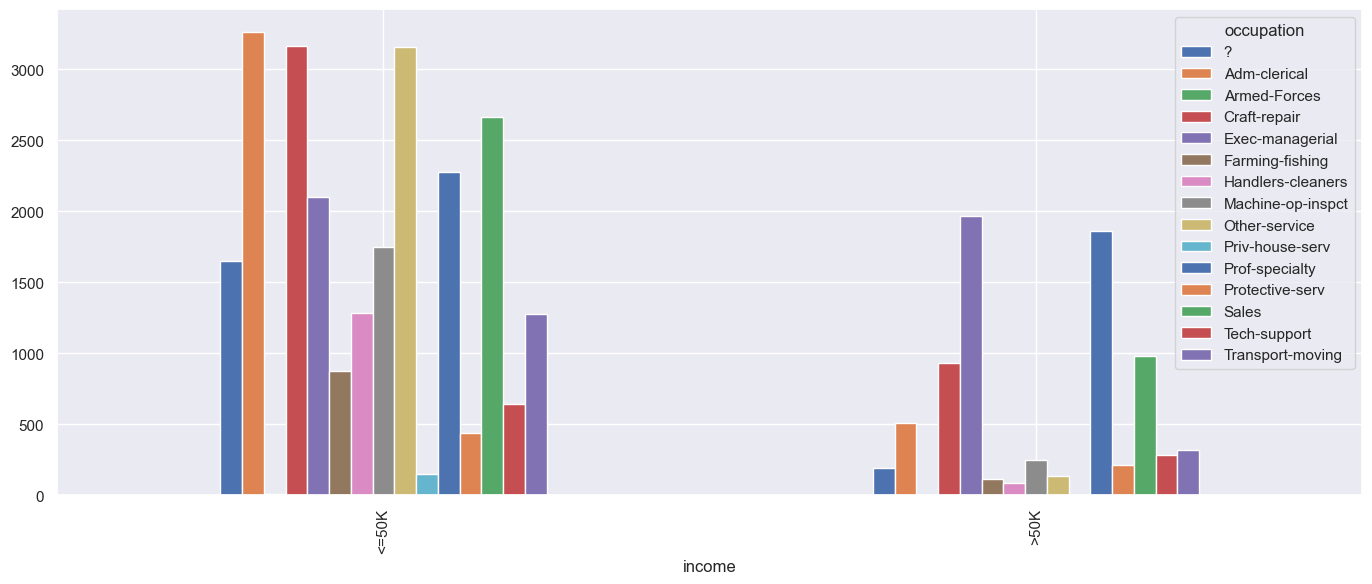

In [27]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind="bar")

<Axes: xlabel='income'>

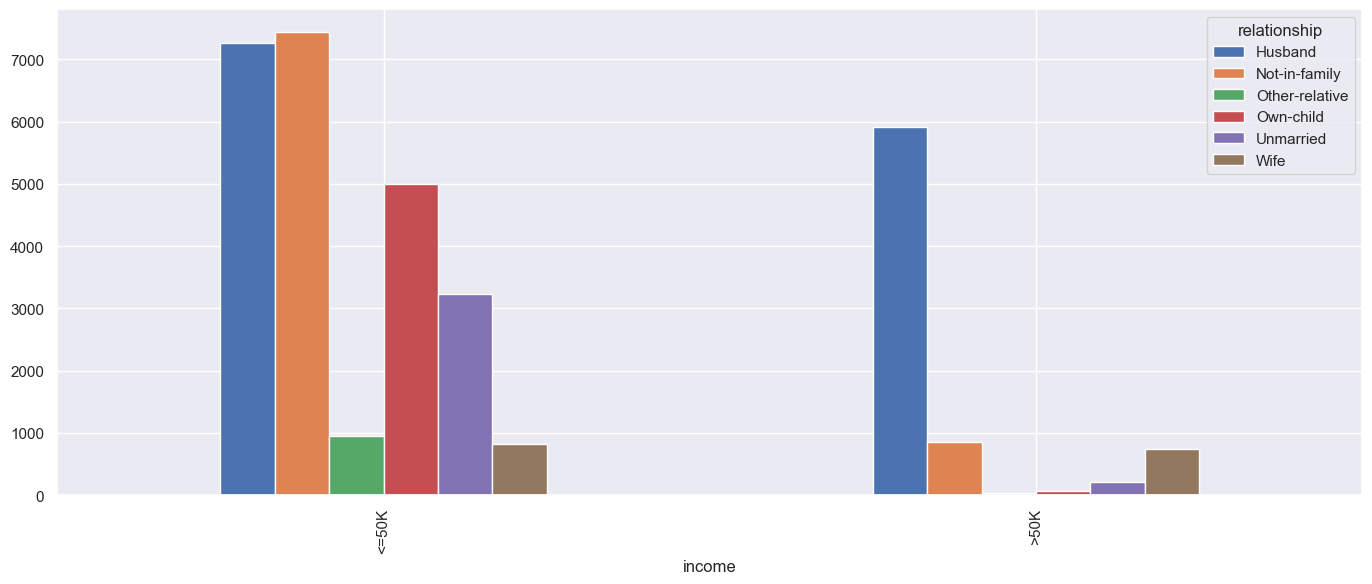

In [28]:
relationship = pd.crosstab(data['income'],data['relationship'])
relationship.plot(kind="bar")

<Axes: xlabel='income'>

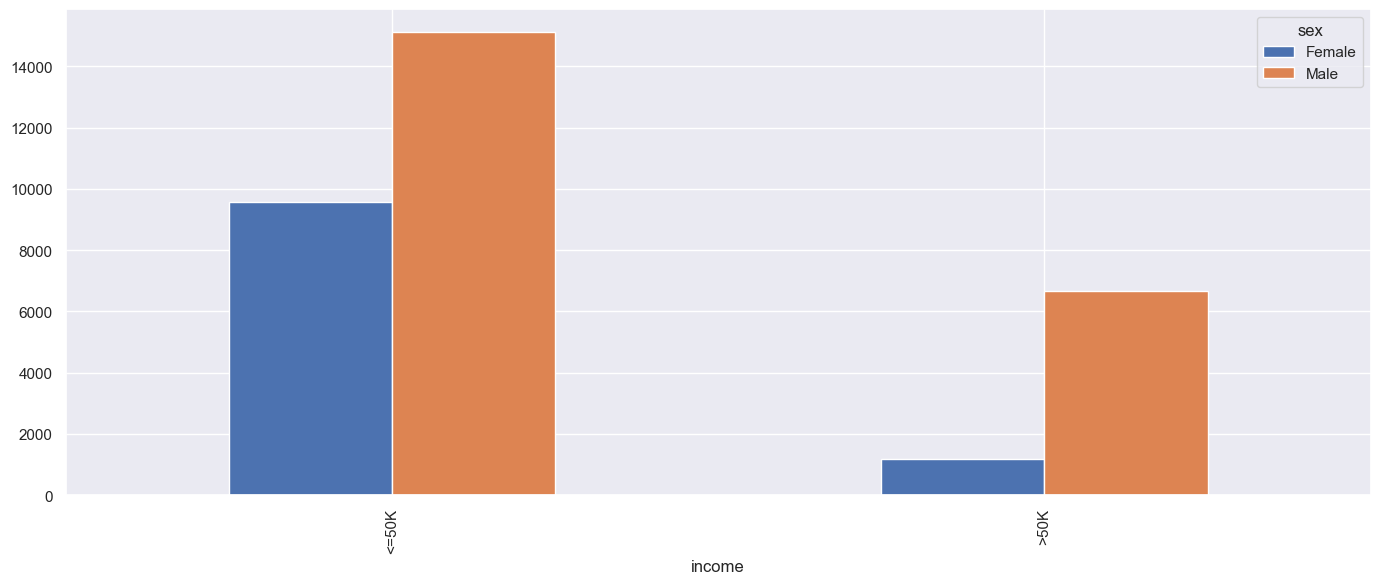

In [29]:
sex = pd.crosstab(data['income'],data['sex'])
sex.plot(kind="bar")

In [30]:
catigorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [31]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital.status,occupation,relationship,race,sex,capital.gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [32]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

# define the categorical features
categorical_features =['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native_country']

# loop through the categorical features and encode them
for feature in categorical_features:
    le.fit(data[feature])
    data[feature] = le.transform(data[feature])

In [33]:
data["income"] = data["income"].map({'<=50K':0, '>50K':1})

<Axes: >

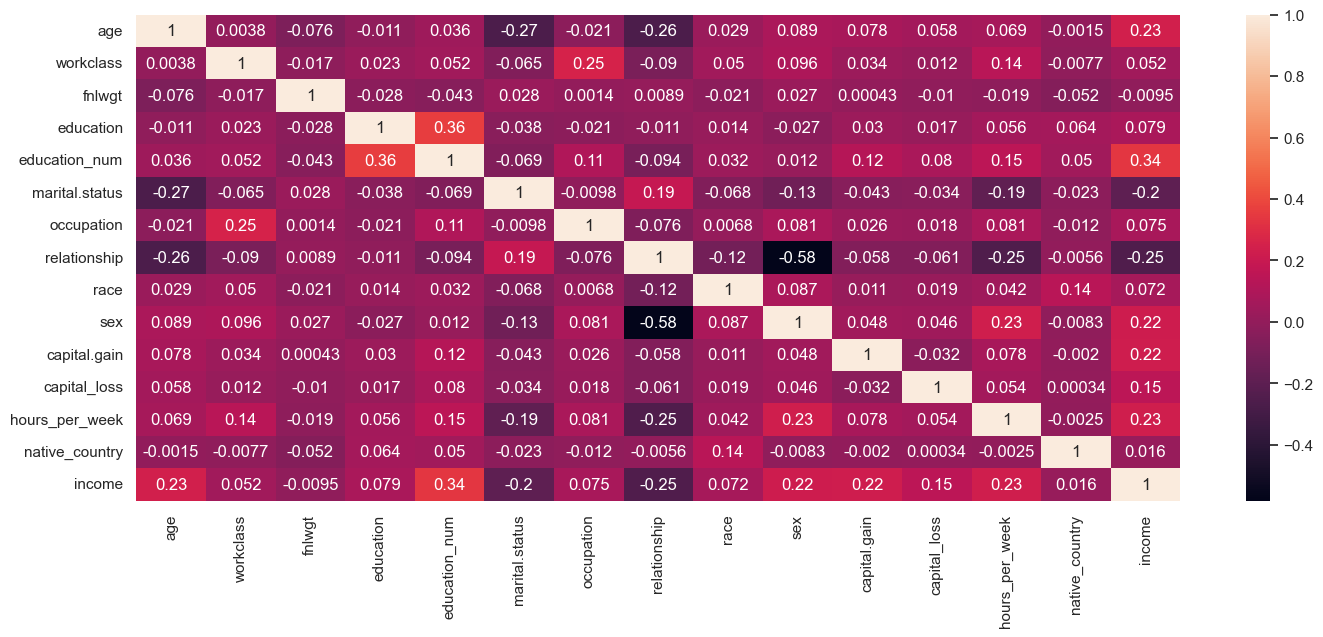

In [34]:
sns.heatmap(data.corr(),annot=True)

In [35]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital.status,occupation,relationship,race,sex,capital.gain,capital_loss,hours_per_week,native_country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


In [36]:
data['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [37]:
# droping education_num column because we have education ordinal encorded one
data.drop(["education","fnlwgt", "native_country"],axis=1,inplace=True)

In [38]:
data.head()

,age,workclass,education_num,marital.status,occupation,relationship,race,sex,capital.gain,capital_loss,hours_per_week,income
0,90,0,9,6,0,1,4,0,0,4356,40,0
1,82,4,9,6,4,1,4,0,0,4356,18,0
2,66,0,10,6,0,4,2,0,0,4356,40,0
3,54,4,4,0,7,4,4,0,0,3900,40,0
4,41,4,10,5,10,3,4,0,0,3900,40,0


In [39]:
data.to_csv("income.csv",index=False)

## Model Traning

In [40]:
data.shape

(32537, 12)

In [41]:
# Saprate dependent and indipendent features
x = data.drop("income",axis=1)
y = data["income"]

In [42]:
catigorical_features = x.select_dtypes(include="object").columns
numerical_features = x.select_dtypes(exclude="object").columns
print(catigorical_features)
print(numerical_features)

Index([], dtype='object')
Index(['age', 'workclass', 'education_num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital.gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')


In [43]:
#(age, workclass, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country)

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
#pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [45]:
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]

) # to standardize the data values into a standard format.

cato_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler",StandardScaler())
    ]

)

# apply transform to particular columns. 
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])


In [46]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [47]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 11)
(6508, 11)
(26029,)
(6508,)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [49]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"CONFUSION_METRIX: {confusion_matrix(test,predict)}")
    
    precision = print(f"PRECISION_SCORE: {precision_score(test,predict)}")
    
    recall = print(f"RECALL_SCORE: {recall_score(test,predict)}")
    
    f1score = print(f"F1_SCORE: {f1_score(test,predict)}")
    
    accuracyscore = print(f"ACCURACY_SCORE: {accuracy_score(test,predict)}")
    
    return confusionmetrix,precision,recall,f1score,accuracyscore
    

## Use Hyperparemetertuning

In [50]:
lr = LogisticRegression()

In [51]:
pram = {
    "class_weight":["balanced"],
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
    
}

In [52]:
grid = GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=-1, verbose=3)

In [53]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [54]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [55]:
grid.score(X_train,y_train)

0.7794383187982635

In [56]:
y_prad = grid.predict(X_test)

In [57]:
accuracy_score(y_test,y_prad)

0.7811923786109404

In [58]:
dr = DecisionTreeClassifier()

In [59]:
param_grid = {
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [60]:
grid_search = GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [61]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [62]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'best'}

In [63]:
grid_search.score(X_train,y_train)

0.7364093895270659

In [64]:
y_prad = grid_search.predict(X_test)

In [65]:
accuracy_score(y_test,y_prad)

0.7257221880762139

In [66]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79      4988
           1       0.45      0.88      0.60      1520

    accuracy                           0.73      6508
   macro avg       0.70      0.78      0.70      6508
weighted avg       0.83      0.73      0.75      6508



In [67]:
rf = RandomForestClassifier()

In [68]:
param_grid = {
    "class_weight":["balanced"],
    'n_estimators': [20, 50, 30],
    'max_depth': [10, 8, 5],
    'min_samples_split': [2, 5, 10],
}

In [69]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [70]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [71]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 50}

In [72]:
grid_search.score(X_train,y_train)

0.8244266010987744

In [73]:
y_prad = grid_search.predict(X_test)

In [74]:
accuracy_score(y_test,y_prad)

0.8076213890596189

In [75]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      4988
           1       0.56      0.87      0.68      1520

    accuracy                           0.81      6508
   macro avg       0.75      0.83      0.77      6508
weighted avg       0.86      0.81      0.82      6508



# Happy Learning!

In [76]:
params = {
                "Random Forest":{
                    "class_weight":["balanced"],
                    'n_estimators': [20, 50, 30],
                    'max_depth': [10, 8, 5],
                    'min_samples_split': [2, 5, 10],
                },
                "Decision Tree":{
                    "class_weight":["balanced"],
                    "criterion":['gini',"entropy","log_loss"],
                    "splitter":['best','random'],
                    "max_depth":[3,4,5,6],
                    "min_samples_split":[2,3,4,5],
                    "min_samples_leaf":[1,2,3],
                    "max_features":["auto","sqrt","log2"]
                },
                "Logastic":{
                    "class_weight":["balanced"],
                    'penalty': ['l1', 'l2'],
                    'C': [0.001, 0.01, 0.1, 1, 10, 100],
                    'solver': ['liblinear', 'saga']
                }
            }